In [1]:
!pip install PyAlgoTrade

     |████████████████████████████████| 84 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 148 kB/s 
  Created wheel for PyAlgoTrade: filename=PyAlgoTrade-0.20-py3-none-any.whl size=159539 sha256=959a4374988a003892f05c2b65a09a6741dac09ec09413b85b514e602c4f795a
  Stored in directory: /root/.cache/pip/wheels/dc/8a/b6/35ea0dc111f06f543f247bcad01163ef52230059446d1052e6
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=c7d801f900232477f755d23897b5cfec304f17027b91bde8686b398084324dfb
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0f534387f029ce287288cd471b1ec06abfcdf915f34b150a6d332da7ed97ab7d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built PyAlgoTrade ws4py retrying


2022-05-11 05:23:34,835 strategy [INFO] Final portfolio value: $15125.918149999994


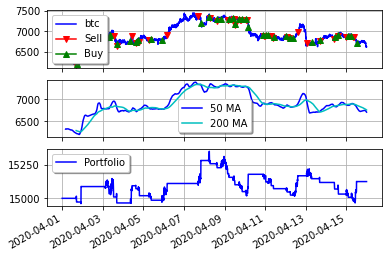

In [4]:
from pyalgotrade.barfeed import csvfeed
from pyalgotrade.broker import backtesting
from pyalgotrade import plotter

import sys 
import os
sys.path.append(os.path.abspath("/content/"))
from ma_cross_strategy import MACrossoverStrategy

def run_strategy(fastSma, slowSma, tp, stop):
    # Load the bar feed from the CSV file
    feed = csvfeed.GenericBarFeed(frequency=60*5)
    feed.setDateTimeFormat("%Y-%m-%dT%H:%M:%S.%fZ")
    feed.addBarsFromCSV("btc", "btc-5m-apr.csv")
    
    # Create our broker defining the comission(0,01%) and the initial balance($15000)
    commission = backtesting.TradePercentage(0.0001)
    broker = backtesting.Broker(15000, feed, commission)

    # Evaluate the strategy with the feed
    myStrategy = MACrossoverStrategy(feed, "btc", broker, fastSma, slowSma, tp, stop)

    # Attach the plotter to the strategy
    plt = plotter.StrategyPlotter(myStrategy)

    # Include the MA in the instrument's subplot to get it displayed along with the closing prices
    plt.getOrCreateSubplot("MA").addDataSeries("50 MA", myStrategy.getFastSMA())
    plt.getOrCreateSubplot("MA").addDataSeries("200 MA", myStrategy.getSlowSMA())

    # Run the strategy and show the final portfolio value
    myStrategy.run()
    myStrategy.info(f'Final portfolio value: ${myStrategy.getResult()}')

    # Plot the strategy
    plt.plot()

run_strategy(50, 200, 0.018, 0.003)